<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Prashanth/SA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [3]:
a = 'This was a good movie.'
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [4]:
a = 'This was the best, most awesome movie EVER MADE!!!'
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.425, 'pos': 0.575, 'compound': 0.8877}

In [5]:
a = 'This was the worst film to ever disgrace the screen.'
sid.polarity_scores(a)

{'neg': 0.477, 'neu': 0.523, 'pos': 0.0, 'compound': -0.8074}

In [6]:
import numpy as np
import pandas as pd

df = pd.read_csv('../TextFiles/amazonreviews.tsv', sep='\t')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../TextFiles/amazonreviews.tsv'

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data
nltk.download('vader_lexicon', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

from nltk.sentiment import SentimentIntensityAnalyzer
print('✅ Libraries imported and NLTK data downloaded!')

✅ Libraries imported and NLTK data downloaded!


In [8]:

# Sample product reviews
reviews = [
    'This product is amazing! I love it.',
    'Terrible experience, will not buy again.',
    'It works as expected. Nothing special.',
    'Absolutely fantastic! Exceeded my expectations.',
    'Not worth the price. Very disappointed.',
    'Great value for money.',
    'The quality is poor and it broke quickly.',
    'I am satisfied with my purchase.',
    'Worst product ever.',
    'Decent, but could be better.'
]
labels = ['positive', 'negative', 'neutral', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'neutral']
df = pd.DataFrame({'review': reviews, 'label': labels})
df.head()


,review,label
0,This product is amazing! I love it.,positive
1,"Terrible experience, will not buy again.",negative
2,It works as expected. Nothing special.,neutral
3,Absolutely fantastic! Exceeded my expectations.,positive
4,Not worth the price. Very disappointed.,negative


VADER Sentiment Predictions:
                                            review  vader_score vader_pred
0              This product is amazing! I love it.       0.8516   positive
1         Terrible experience, will not buy again.      -0.4767   negative
2           It works as expected. Nothing special.      -0.3089   negative
3  Absolutely fantastic! Exceeded my expectations.       0.6352   positive
4          Not worth the price. Very disappointed.      -0.6198   negative
5                           Great value for money.       0.7579   positive
6        The quality is poor and it broke quickly.      -0.7096   negative
7                 I am satisfied with my purchase.       0.4215   positive
8                              Worst product ever.      -0.6249   negative
9                     Decent, but could be better.       0.5927   positive


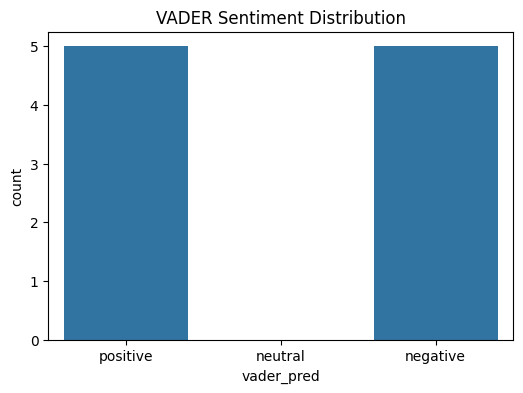

In [9]:
sia = SentimentIntensityAnalyzer()
df['vader_score'] = df['review'].apply(lambda x: sia.polarity_scores(x)['compound'])
def vader_label(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'
df['vader_pred'] = df['vader_score'].apply(vader_label)

print('VADER Sentiment Predictions:')
print(df[['review', 'vader_score', 'vader_pred']])

# Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='vader_pred', data=df, order=['positive','neutral','negative'])
plt.title('VADER Sentiment Distribution')
plt.show()

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.00      0.00      0.00         1
    positive       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



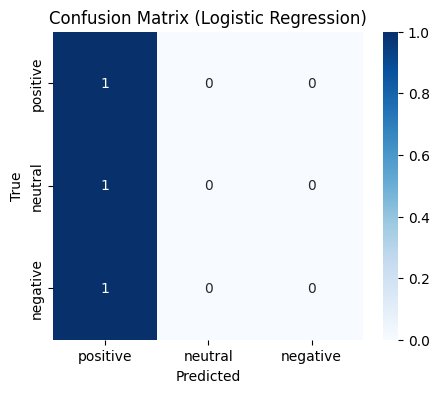

In [10]:
# Preprocessing
X = df['review']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)

print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['positive','neutral','negative'])
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive','neutral','negative'], yticklabels=['positive','neutral','negative'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

In [13]:
negation_examples = [
    'I do not like this product.',
    'Not bad at all!',
    'I cant say its good.',
    'This is not the worst experience.',
    'I am not unhappy with the result.'
]
for text in negation_examples:
    score = sia.polarity_scores(text)['compound']
    label = vader_label(score)
    print(f'"{text}" -> Score: {score:.2f}, Sentiment: {label}')


"I do not like this product." -> Score: -0.28, Sentiment: negative
"Not bad at all!" -> Score: 0.48, Sentiment: positive
"I cant say its good." -> Score: -0.34, Sentiment: negative
"This is not the worst experience." -> Score: 0.51, Sentiment: positive
"I am not unhappy with the result." -> Score: 0.33, Sentiment: positive


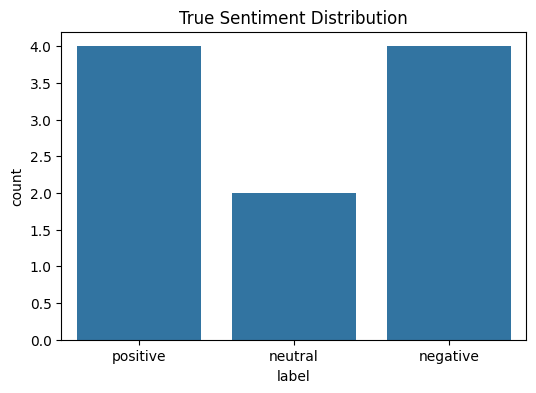

In [14]:

plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, order=['positive','neutral','negative'])
plt.title('True Sentiment Distribution')
plt.show()

In [16]:
# Import spaCy and load the language library
import spacy


In [23]:
nlp = spacy.load('en_core_web_md')  # make sure to use a larger model!
nlp(u'lion').vector



array([-0.76275  , -0.2074   ,  0.32124  , -0.45817  , -0.36041  ,
        0.60152  ,  0.74492  ,  0.079701 , -0.23428  ,  0.31224  ,
       -0.43189  ,  0.20746  , -0.40774  , -0.2538   , -0.12308  ,
       -0.39652  ,  0.2361   ,  0.20473  ,  0.49645  ,  0.26983  ,
       -0.45623  ,  0.20879  , -0.0027486,  0.050435 , -0.003348 ,
       -0.088146 , -0.53855  ,  0.42507  , -0.70535  , -0.31984  ,
       -0.56023  , -0.042877 ,  0.31083  , -0.23038  ,  0.43657  ,
        0.18436  ,  0.52997  , -0.1038   ,  0.010579 ,  0.5373   ,
       -0.64911  ,  0.15171  , -0.13305  , -0.17798  ,  0.083277 ,
       -0.15615  , -0.1446   , -0.27032  ,  0.19693  ,  0.22867  ,
       -0.5745   ,  0.16468  ,  0.029028 ,  0.66735  , -0.13859  ,
        0.51194  , -0.029928 ,  0.11792  , -0.15589  ,  0.69151  ,
        0.19838  ,  0.032428 ,  0.37526  ,  0.099998 , -0.48631  ,
       -0.13605  ,  0.5295   , -0.089214 ,  0.34458  ,  0.19393  ,
        0.012607 , -0.1999   , -0.38105  , -0.05991  , -0.8103

In [24]:

# Create a three-token Doc object:
tokens = nlp(u'lion cat pet')

# Iterate through token combinations:
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

lion lion 1.0
lion cat 0.31077107787132263
lion pet 0.31077107787132263
cat lion 0.31077107787132263
cat cat 1.0
cat pet 1.0000001192092896
pet lion 0.31077107787132263
pet cat 1.0000001192092896
pet pet 1.0


In [25]:
# For brevity, assign each token a name
a,b,c = tokens

# Display as a Markdown table (this only works in Jupyter!)
from IPython.display import Markdown, display
display(Markdown(f'<table><tr><th></th><th>{a.text}</th><th>{b.text}</th><th>{c.text}</th></tr>\
<tr><td>**{a.text}**</td><td>{a.similarity(a):{.4}}</td><td>{b.similarity(a):{.4}}</td><td>{c.similarity(a):{.4}}</td></tr>\
<tr><td>**{b.text}**</td><td>{a.similarity(b):{.4}}</td><td>{b.similarity(b):{.4}}</td><td>{c.similarity(b):{.4}}</td></tr>\
<tr><td>**{c.text}**</td><td>{a.similarity(c):{.4}}</td><td>{b.similarity(c):{.4}}</td><td>{c.similarity(c):{.4}}</td></tr>'))

<table><tr><th></th><th>lion</th><th>cat</th><th>pet</th></tr><tr><td>**lion**</td><td>1.0</td><td>0.3108</td><td>0.3108</td></tr><tr><td>**cat**</td><td>0.3108</td><td>1.0</td><td>1.0</td></tr><tr><td>**pet**</td><td>0.3108</td><td>1.0</td><td>1.0</td></tr>

In [26]:
# Create a three-token Doc object:
tokens = nlp(u'like love hate')

# Iterate through token combinations:
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

like like 1.0
like love 1.0
like hate 1.0
love like 1.0
love love 1.0
love hate 1.0
hate like 1.0
hate love 1.0
hate hate 1.0


In [27]:
tokens = nlp(u'dog cat nargle')

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

dog True 7.443447 False
cat True 7.443447 False
nargle False 0.0 True


In [28]:
from scipy import spatial

cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)

king = nlp.vocab['king'].vector
man = nlp.vocab['man'].vector
woman = nlp.vocab['woman'].vector

# Now we find the closest vector in the vocabulary to the result of "man" - "woman" + "queen"
new_vector = king - man + woman
computed_similarities = []

for word in nlp.vocab:
    # Ignore words without vectors and mixed-case words:
    if word.has_vector:
        if word.is_lower:
            if word.is_alpha:
                similarity = cosine_similarity(new_vector, word.vector)
                computed_similarities.append((word, similarity))

computed_similarities = sorted(computed_similarities, key=lambda item: -item[1])

print([w[0].text for w in computed_similarities[:10]])

['woman', 'king', 'll', 'got', 'has', 'lovin', 'ol', 'n', 'it', 'where']
